# 4.  Measurement

PennyLane can extract different types of [measurement results](https://docs.pennylane.ai/en/stable/introduction/measurements.html) from a quantum machine: the mean value of an observable, its variance, samples of a single measurement or computational basis state probabilities.

There are various measurement functions, such as


*   `qml.expval()`
*   `qml.var()`
*   `qml.sample()`
*   `qml.counts()`
*   `qml.probs()`
*   `qml.density_matrix()`


As mentioned above, you can also return the state in the calculation base with `qml.state()`

## Expectation value and variance of an observable

In [ ]:
dev = qml.device('default.qubit', wires=2)
@qml.qnode(dev)
def circuit_expval(theta):
    qml.RX(theta, wires=0)
    qml.Hadamard(wires=1)
    qml.CNOT(wires=[0, 1])
    return qml.expval(qml.PauliY(0))

Here we return the average value `qml.expval()` of the $Y$ operator applied to the first qubit. More precisely, this means we calculate $\langle \psi \vert Y \vert \psi \rangle$, where $\vert \psi \rangle$ is the $2^n$-dimensional vector generated by the circuit ($n$ being the number of qubits) and $Y$ is an operator that acts only on the first qubit. When we run the circuit for $\theta=0.5$, we obtain a number that corresponds exactly to this average output value.

In [ ]:
circuit_expval(0.5)

tensor(-0.47942554, requires_grad=True)

We can also return the variance of an observable, `qml.var()`.

In [ ]:
@qml.qnode(dev)
def circuit_var(theta):
    qml.RX(theta, wires=0)
    qml.Hadamard(wires=1)
    qml.CNOT(wires=[0, 1])
    return qml.var(qml.PauliY(0))

circuit_var(0.5)

tensor(0.77015115, requires_grad=True)

## Samples and probabilities

In reality, in an experiment we usually obtain a set of real measurements sampled from the probabilities of the wave function. In this case, the actual wave function is not accessible, but again, we can "cheat" as we simulate our circuit in the classical way.


So, if we want to mimic a quantum computer, we can output a set of measurements from the resulting state. To do this, we use the function `qml.sample()`, for which we need to specify the number of samples ('shots') when defining the machine.

In [ ]:
dev = qml.device("default.qubit", wires=2, shots=4)
@qml.qnode(dev)
def circuit_sample(theta):
    qml.RX(theta, wires=0)
    qml.Hadamard(wires=1)
    qml.CNOT(wires=[0, 1])
    return qml.sample(qml.PauliY(0))

circuit_sample(0.5)


array([-1, -1, -1,  1])

Here, PennyLane takes the eigenvalues λᵢ of the observable and samples them with their associated probabilities p(λᵢ) = |⟨ξᵢ|ψ⟩|², where, |ξᵢ⟩ is the corresponding ground state in the observable's basis.

Instead of sampling from the probability density of the wave function, we might be interested in directly obtaining the probabilities of each state in the computational basis. PennyLane allows us to do this using the function `qml.probs()`.

In [ ]:
dev = qml.device("default.qubit", wires=2)
@qml.qnode(dev)
def circuit_probs(theta):
    qml.RX(theta, wires=0)
    qml.Hadamard(wires=1)
    qml.CNOT(wires=[0, 1])
    return qml.probs(wires=[0, 1])
Statevector(circuit_probs(0.5)).draw('latex')


<IPython.core.display.Latex object>

We obtain observation probabilities of around 47% for states |00⟩ and |01⟩ and 3% for states |10⟩ and |11⟩.

EXERCISE

---


Implement the circuit below so that it returns the mean value of the $Z$ operator. What is this average value? Calculate it explicitly and compare it with the circuit result.

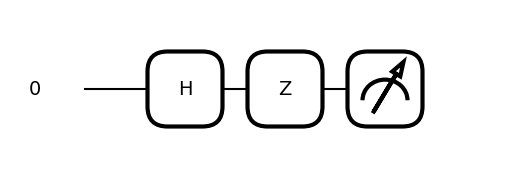

In [ ]:
dev = qml.device('default.qubit', wires = 1)
@qml.qnode(dev)
def circuit():

    ##################
    # YOUR CODE HERE #
    ##################
    #qml.Hadamard(wires = 0)
    #qml.Z(wires = 0)

    return #qml.expval(qml.Z(wires = 0))
print(circuit())

1.0


In the last exercise, you calculated the mean value analytically. On real quantum hardware, the probabilistic nature of quantum computation forces us to sample repeatedly in order to calculate the mean value.

Consider the same circuit, but test it with several 'shots'. What are the possible values after a single sampling? What happens when you increase the number of samples?

In [ ]:
#Adapted from Codebook I.10.2
results = []

# Different number of samples
n_echantillons = [1, 100, 1000, 10000, 100000]

for echantillon in n_echantillons:
    ##################
    # YOUR CODE HERE #
    ##################
    dev = qml.device('default.qubit', wires = 1, shots = echantillon)
    @qml.qnode(dev)
    def circuit():
        #qml.Hadamard(wires = 0)
        #qml.Z(wires = 0)
        return #qml.expval(qml.Z(wires = 0))

    results.append(circuit())

results 

## States and density matrix
  

The `qml.state()` measure gives us the most complete output possible, i.e. the complete wave function in the calculation base. It accepts no observables and returns a pure state.

In [ ]:
@qml.qnode(dev)
def circuit_state(theta):
    qml.RX(theta, wires=0)
    qml.Hadamard(wires=1)
    qml.CNOT(wires=[0, 1])
    return qml.state()


Statevector(circuit_state(0.5)).draw('latex')


<IPython.core.display.Latex object>

We may also be interested in obtaining the density matrix in the calculation base. In this case, we can use `qml.density_matrix()`.

In [ ]:
@qml.qnode(dev)
def circuit_density_matrix(theta):
    qml.RX(theta, wires=0)
    qml.Hadamard(wires=1)
    qml.CNOT(wires=[0, 1])
    return qml.density_matrix(wires=0)

circuit_density_matrix(0.5)


tensor([[0.93879128+0.j        , 0.        +0.23971277j],
        [0.        -0.23971277j, 0.06120872+0.j        ]], requires_grad=True)